In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load energies from txt files

In [12]:
OF_data = np.genfromtxt('OpenFermion_energies.txt')
QK_data = np.genfromtxt('Qiskit_energies.txt')
theta_range, R_range = OF_data[1:,0], OF_data[0,1:]
theta_points,R_points = len(theta_range), len(R_range)
E_OF, E_QK = OF_data[1:,1:], QK_data[1:,1:]

In [21]:
def plot_results(R_range,theta_range,E0,E):
    plt.figure(figsize=(12,4))
    plt.subplot(121,box_aspect=0.7)
    plt.xlabel(r'Internuclear distance $R$ (Å)')
    plt.ylabel(r'Ground state energy $\langle E_0 \rangle$ (Ha)')
    plt.plot(R_range,E0)

    plt.subplot(122,aspect=1)
    plt.xlabel(r'Internuclear distance $R$ (Å)')
    plt.ylabel(r'$\theta$ ($\pi$ rad)')
    plt.plot(R_range,theta_range[np.argmin(E,axis=0)]/np.pi,c='white',lw=2)
    im = plt.imshow(E,extent=[min(R_range),max(R_range),min(theta_range)/np.pi,max(theta_range)/np.pi],
                    cmap='gnuplot',aspect=1.25,origin='lower')
    plt.colorbar(im,label=r'$\langle E \rangle$ (Ha)')
    plt.show()
    
def compare_hamiltonians(theta_range,R_range,E1,E2):
    plt.figure(figsize=(12,10))
    R_points = len(R_range)
    for i in range(R_points):
        plt.subplot(int(np.ceil(np.sqrt(R_points)+1)),int(np.sqrt(R_points)),i+1)
        plt.title(r"$R=$"+str(round(R_range[i],2))+" Å")
        plt.plot(theta_range,E1[:,i])
        plt.plot(theta_range,E2[:,i])
        plt.axis('off')
    plt.show()

## Manual Qiskit Hamiltonian Correction

Rotation of 180$^\circ$ around the point $(\theta,E) = (\pi,0)$ is applied by negating the horizontal ($\theta$) and vertical ($E$) axes and verticle shift by applying a manually fitted array, `II_cor` to correct the difference between the two sets of Hamiltonians.

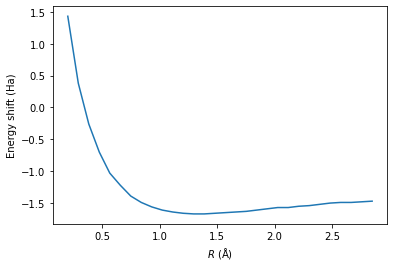

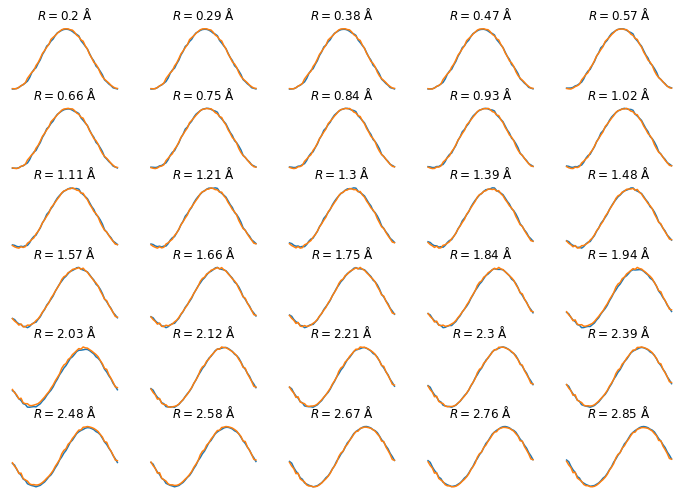

In [22]:
II_cor = np.array([ 1.43,  0.38, -0.26, -0.70, -1.03, -1.22, -1.39, -1.49, -1.56, -1.61,
                   -1.64, -1.66, -1.67, -1.67, -1.66, -1.65, -1.64, -1.63, -1.61, -1.59,
                   -1.57, -1.57, -1.55, -1.54, -1.52, -1.50, -1.49, -1.49, -1.48, -1.47])
II_cor_big = np.empty((theta_points,R_points))
for r in range(R_points):
    II_cor_big[:,r] = II_cor[r]
          
plt.figure()
plt.xlabel(r"$R$ (Å)"); plt.ylabel("Energy shift (Ha)")
plt.plot(R_range,II_cor)
plt.show()

compare_hamiltonians(theta_range,R_range,E_OF,II_cor_big-E_QK[::-1,:])

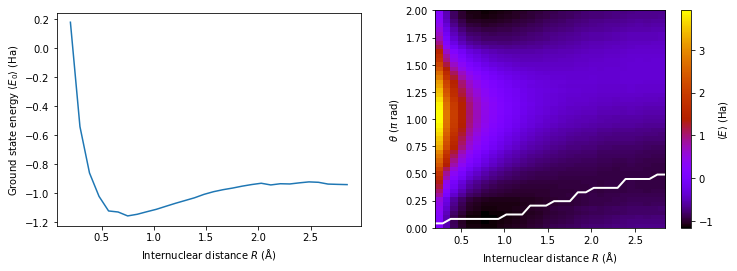

In [20]:
plot_results(R_range,theta_range,np.min(II_cor_big-E_QK[::-1,:],axis=0),II_cor_big-E_QK[::-1,:])

This closely matches the OpenFermion and theoretical results (figures 2 and 3 of [O'Malley](https://journals.aps.org/prx/pdf/10.1103/PhysRevX.6.031007) and figure 5d from [Xue](https://arxiv.org/abs/2107.00628)), proving this is indeed a working correction for the hydrogen molecule energies.

## Nuclear repulsion and opposite qubit order

The mirroring of the E-axis can be integrated in the vertical shift, the shift energies that follow are the nuclear repulsion energies

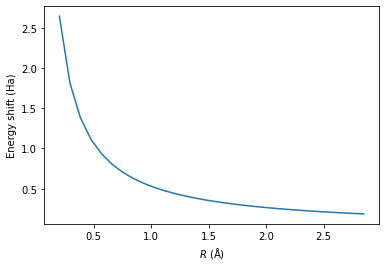

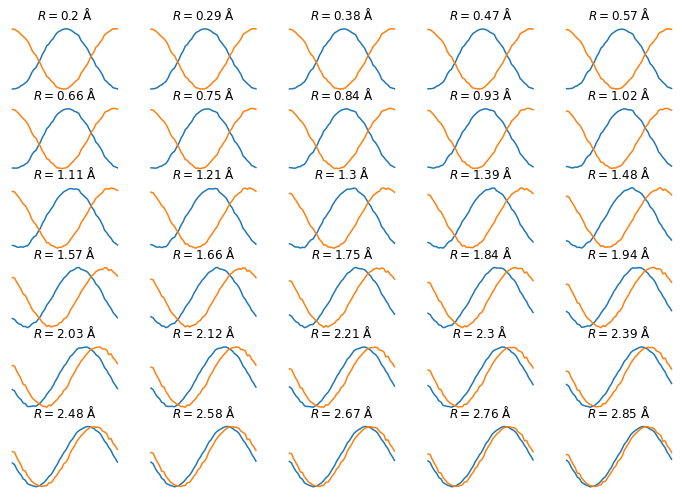

In [35]:
# Stored from PSI4DriverOld(molecule = molecule).run().nuclear_repulsion_energy for each R
nuclear_repulsion_energies = np.array([2.64588605335,1.8161111372106509,1.382535054903604,1.116082844322182,
                                       0.9357401895993901,0.8055716067942258,0.707195350664977,0.6302315856028747,
                                       0.5683755225714815,0.517576361194941,0.4751126659266254,0.4390883865359084,
                                       0.40814199759122344,0.3812705368802485,0.35771886035967365,0.3369075545429199,
                                       0.3183846288263486,0.30179231286981323,0.28684372167158884,0.27330612839590385,
                                       0.2609887603644558,0.24973375279788446,0.2394093464809672,0.22990470575925093,
                                       0.22112592376700288,0.2129929092217904,0.20543693586921014,0.19839869566166773,
                                       0.191826738867875,0.18567621427017544])
nre_big = np.empty((theta_points,R_points))
for r in range(R_points):
    nre_big[:,r] = nuclear_repulsion_energies[r]
          
plt.figure()
plt.xlabel(r"$R$ (Å)"); plt.ylabel("Energy shift (Ha)")
plt.plot(R_range,nuclear_repulsion_energies)
plt.show()

compare_hamiltonians(theta_range,R_range,E_OF,nre_big+E_QK)

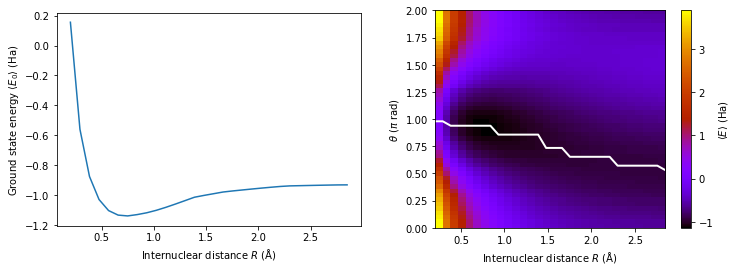

In [34]:
plot_results(R_range,theta_range,np.min(nre_big+E_QK,axis=0),nre_big+E_QK)